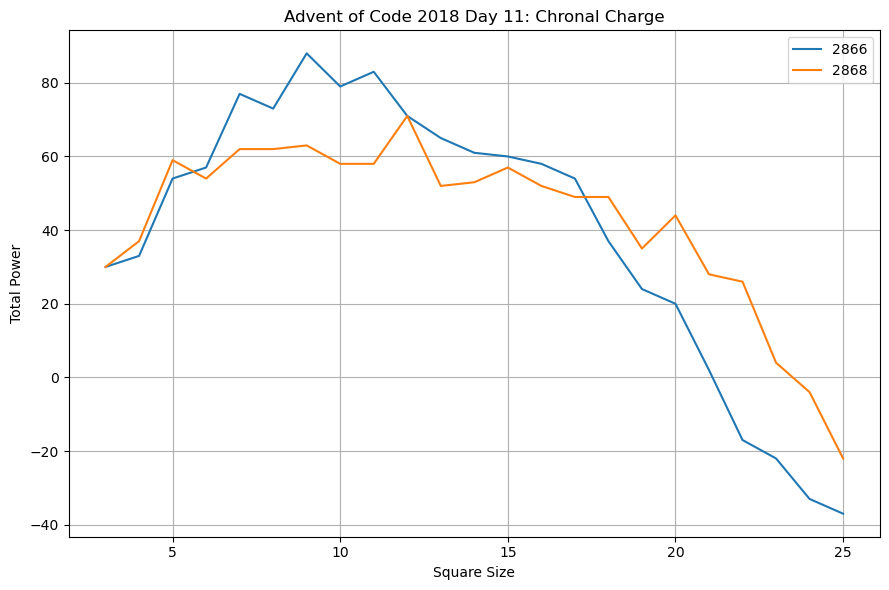

In [1]:
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt

gridserials = [2866, 2868]
gridsize    = 300
squarerange = (3, 26)

grid = np.zeros((gridsize, gridsize), dtype=np.int32)
xlen = squarerange[1] - squarerange[0]
data = np.zeros((len(gridserials), xlen, 2), dtype=np.int32)

def powerlevel(x, y, s):
    return ((x + 10) * y + s) * (x + 10) // 100 % 10 - 5

for i in range(len(gridserials)):
    s = gridserials[i]
    for y in range(gridsize):
        for x in range(gridsize):
            grid[y, x] = powerlevel(x + 1, y + 1, s)
    for j in range(xlen):
        squaresize = squarerange[0] + j
        kernel = np.ones((squaresize, squaresize), dtype=np.int32)
        totalpower = convolve2d(grid, kernel, mode='valid').max()
        data[i, j] = [squaresize, totalpower]

fig, ax = plt.subplots(figsize=(9,6))
ax.set_title('Advent of Code 2018 Day 11: Chronal Charge')
ax.set_xlabel('Square Size')
ax.set_ylabel('Total Power')
ax.grid(True, which='both')
for i in range(len(gridserials)):
    ax.plot(*np.transpose(data[i]), label=gridserials[i])
ax.legend()
fig.tight_layout()
plt.show()